In [9]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

# Gnan harmonski oscilator

Gnan harmonski oscilator opisuje enačba

$$ \theta''(t) + b\theta'(t) + c\sin(\theta(t)) + d \sin(\omega t) = 0 $$

Kjer je $ b $ koeficient dušenja, $ c $ pa je določen z dolžino nihala $ c = \frac{g}{l} $.

$ d \sin(\omega t) $ je zunanji (periodični) vpliv zunanje sile.

Narišite odvisnost pozicije nihala od časa. Uporabite spodnje podatke.

Rešitev poiščite na dva načina:
1. Z uporabo metode eulerODE2 iz vaj
2. Z uporabe integrate.solve_ivp metode

In [10]:
length = 2
c = 9.81/length

b = 0.1
d = -1.0
omega = 1.0

t0 = 0
theta00 = 2.0
theta10 = 0
nmax = 200
h = 0.5

# Reševanje diferencialnih enačb

Spomnimo se metode za reševanje diferencialnih enačb drugega reda iz vaj

In [11]:
def eulerODE2(f,t0,y00,y10,nmax,h):
    # f: Function
    # t0: Starting time
    # y00: Starting value of y(t)
    # y10: Starting value of y'(t)
    # nmax: Number of iterations
    # h: Stepsize
    y0 = y00
    y1 = y10
    t = t0
    t_values = [t]
    y0_values = [y0]
    y1_values = [y1]
    for i in range(1, nmax+1):
        y0 = y0 + y1 * h
        y1 = y1 + f(t,y0,y1) * h
        t = t + h
        t_values.append(t)
        y0_values.append(y0)
        y1_values.append(y1)
    return np.array([t_values, y0_values, y1_values])

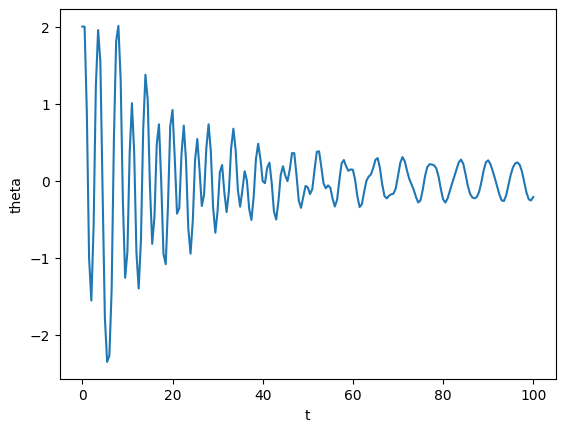

In [12]:
def f_ODE(t,theta0,theta1):
    return -b*theta1 - c*np.sin(theta0) - d*np.sin(omega*t)

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('t')
plt.ylabel('theta')
plt.plot(solution[0], solution[1])

In [13]:
def f_ODE(t,theta):
    return theta[1], -b*theta[1] - c*np.sin(theta[0]) - d*np.sin(omega*t)

theta00 = 2.0
theta10 = 0.0

solution_RK45 = integrate.solve_ivp(f_ODE, [0,100], [theta00, theta10], method = 'RK45', t_eval = np.linspace(0,100,201))

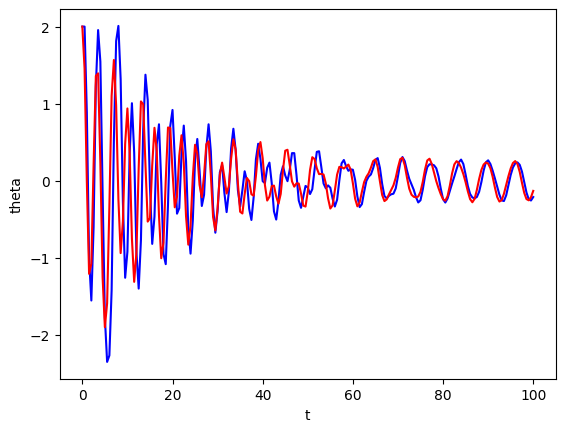

In [14]:
plt.xlabel('t')
plt.ylabel('theta')

plt.plot(solution[0], solution[1], 'blue')
plt.plot(solution_RK45.t, solution_RK45.y[0], 'red')

Uporabite še druge metode
- RK45
- RK23
- DOP853
- Radau
- BDF
- LSODA

metodo spreminjate z argumentom funkcije integrate.solve_ivp, method = "RK45" (vstavite pravilno metodo).

Narišite odstopanje od RK45 metode.

In [15]:
t_array = np.linspace(0,100,201)

solution_RK23 = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='RK23', t_eval=t_array)
solution_DOP853 = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='DOP853', t_eval=t_array)
solution_Radau = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='Radau', t_eval=t_array)
solution_BDF = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='BDF', t_eval=t_array)
solution_LSODA = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='LSODA', t_eval=t_array)

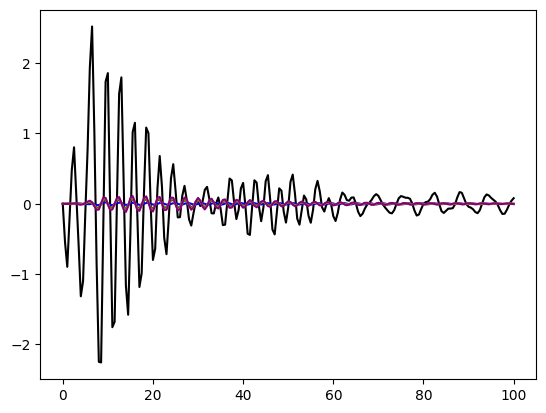

In [16]:
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution[1], 'black')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_RK23.y[0], 'blue')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_DOP853.y[0], 'red')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_Radau.y[0], 'green')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_BDF.y[0], 'orange')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_LSODA.y[0], 'purple')